In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
# Summary of Day 2 - we learned about 
# the differences between mean and median by
# looking at two datasets where the two are
# very different

In [4]:
import numpy as np
na, nb = 20, 15
years = range(20, 220, 10)
ny = len(years)
np.random.seed(123)
growth_a = np.random.lognormal(mean=1., sigma=2., size=(ny, nb))
growth_b = np.random.uniform(low=15., high=25., size=(ny, nb))
# aside - mean of a lognormal distribution is
# exp(mean+sigma^2/2), while the mean of a uniform distribution is
# (low + high) / 2
print(np.exp(1.+2.**2 / 2))
print((15.+25.)/2)

20.085536923187668
20.0


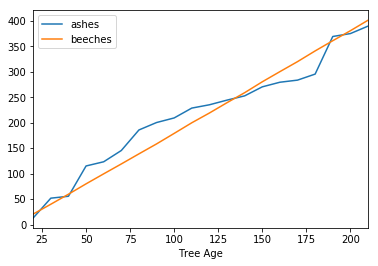

In [10]:
heights_a = np.cumsum(growth_a, axis=0)
heights_b = np.cumsum(growth_b, axis=0)
yrs = pd.Series(years, name='Tree Age')
df_ashes = pd.DataFrame(data=heights_a, index=yrs)
df_beeches = pd.DataFrame(data=heights_b, index=yrs)
df_trees = pd.concat([df_ashes, df_beeches], axis=1,
                     keys=['ashes', 'beeches'])
gb = df_trees.groupby(axis=1, level=0)
gb.mean().plot()

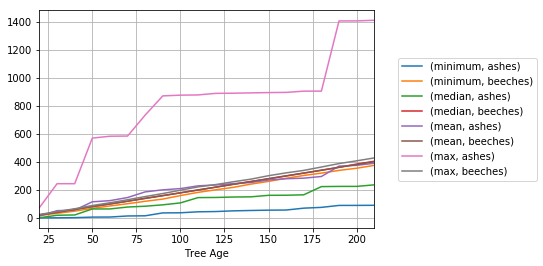

In [11]:
# New: we can compute a complex summary of how the two subgroups differ
summary_stats = pd.concat([gb.min(), gb.median(), gb.mean(), gb.max()], 
                          axis=1,
                          keys=['minimum','median','mean','max'])
summary_stats.plot(grid=True, legend=False)
import matplotlib.pyplot as plt
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

In [34]:
# discrete data offer some other interesting statistics like the
# mode (most frequently occurring value)
n_trees = 100
branches = np.random.binomial(20, 0.5, size=(n_trees,1))
roots = np.random.binomial(10, 0.3, size=(n_trees,1))
df_discrete = pd.DataFrame(data = np.concatenate([branches, roots],axis=1),
                           columns=['branches', 'roots'])
df_discrete.head(10) # only plot first ten rows

,branches,roots
0,11,3
1,10,2
2,5,5
3,13,4
4,12,2
5,10,1
6,7,1
7,9,2
8,10,3
9,8,4


In [35]:
df_discrete.mode()

,branches,roots
0,11,2


In [36]:
df_discrete.describe()

,branches,roots
count,100.000000,100.000000
mean,10.000000,2.870000
std,2.378354,1.260551
min,4.000000,0.000000
25%,9.000000,2.000000
50%,10.000000,3.000000
75%,11.000000,4.000000
max,15.000000,5.000000


In [39]:
# other important point are missing values 
# (they are represented by np.nan or None)
df_discrete.loc[[0, 3, 6, 9], 'branches'] = None
df_discrete.loc[[1, 4, 8], 'roots'] = np.nan

In [40]:
df_discrete.head(10)

,branches,roots
0,NaN,3.0
1,10.0,NaN
2,5.0,5.0
3,NaN,4.0
4,12.0,NaN
5,10.0,1.0
6,NaN,1.0
7,9.0,2.0
8,10.0,NaN
9,NaN,4.0


In [41]:
# now the count (= number of non-NaN values) has changed
df_discrete.describe()

,branches,roots
count,96.000000,97.000000
mean,10.010417,2.886598
std,2.377503,1.273744
min,4.000000,0.000000
25%,9.000000,2.000000
50%,10.000000,3.000000
75%,11.000000,4.000000
max,15.000000,5.000000


In [55]:
# Some data analysis techniques don't work well if we have missing
# values. There are different ways of handling them, e.g. by 
# filling in the mean / median / mode instead:
median = df_discrete.median()
print(median)
df_discrete.fillna(value=median).head(10)


branches    10.0
roots        3.0
dtype: float64


,branches,roots
0,10.0,3.0
1,10.0,3.0
2,5.0,5.0
3,10.0,4.0
4,12.0,3.0
5,10.0,1.0
6,10.0,1.0
7,9.0,2.0
8,10.0,3.0
9,10.0,4.0


In [57]:
# this creates a new data frame -> we would have to write
# df_discrete = df_discrete.fillna(...) to change the
# original data frame
df_discrete.head(10) # still the same!

,branches,roots
0,NaN,3.0
1,10.0,NaN
2,5.0,5.0
3,NaN,4.0
4,12.0,NaN
5,10.0,1.0
6,NaN,1.0
7,9.0,2.0
8,10.0,NaN
9,NaN,4.0


In [58]:
# alternatively we can drop rows with missing values
df_discrete.dropna()

,branches,roots
2,5.0,5.0
5,10.0,1.0
7,9.0,2.0
10,12.0,1.0
11,9.0,1.0
12,8.0,5.0
13,8.0,2.0
14,11.0,2.0
15,10.0,3.0
16,11.0,3.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fbb91e3c8>,
      dtype=object)

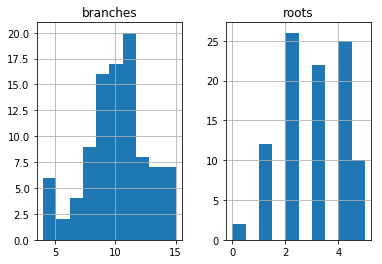

In [59]:
# many pandas methods work gracefully with missing data
# for example, we can plot histograms:
df_discrete.hist()